In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
tc = pd.read_csv('../input/tc.csv')
ts = pd.read_csv('../input/ts.csv')

# Merge the datasets
df = pd.merge(tc.rename(columns={'x': 'tc'}), ts.rename(columns={'x': 'ts'}), left_index=True, right_index=True)


## Estatísticas Descritivas - Explicação dos Indicadores

### 1. **`count`**
- **Definição**: Número de observações não nulas (válidas) na variável.
- **Utilidade**: Mostra quantos valores foram considerados para o cálculo das estatísticas.

---

### 2. **`mean`** (Média)
- **Definição**: Soma de todos os valores dividida pelo número total de observações.
- **Utilidade**: Representa o valor central da variável e é sensível a outliers.

---

### 3. **`std`** (Desvio Padrão)
- **Definição**: Mede a dispersão dos dados em relação à média.
- **Utilidade**: Valores altos indicam maior variabilidade nos dados.

---

### 4. **`variance`** (Variância)
- **Definição**: Quadrado do desvio padrão. Mede a dispersão dos dados em relação à média.
- **Utilidade**: Indica a magnitude da variação nos dados.

---

### 5. **`min`** (Mínimo)
- **Definição**: O menor valor da variável.
- **Utilidade**: Ajuda a entender os limites inferiores dos dados.

---

### 6. **`25%`** (Primeiro Quartil)
- **Definição**: Valor abaixo do qual 25% dos dados se encontram.
- **Utilidade**: Ajuda a identificar a parte inferior da distribuição.

---

### 7. **`50%`** (Mediana)
- **Definição**: O valor central dos dados ordenados.
- **Utilidade**: Divide os dados em duas metades, sendo robusta contra outliers.

---

### 8. **`75%`** (Terceiro Quartil)
- **Definição**: Valor abaixo do qual 75% dos dados se encontram.
- **Utilidade**: Representa a parte superior da distribuição.

---

### 9. **`max`** (Máximo)
- **Definição**: O maior valor da variável.
- **Utilidade**: Ajuda a entender os limites superiores dos dados.

---

### 10. **`range`** (Amplitude)
- **Definição**: Diferença entre o valor máximo e o valor mínimo.
- **Utilidade**: Mede o intervalo completo de variação dos dados.

---

### 11. **`mode`** (Moda)
- **Definição**: Valor mais frequente da variável.
- **Utilidade**: Mostra os valores que aparecem com maior frequência.

---

### 12. **`skewness`** (Assimetria)
- **Definição**: Mede a simetria da distribuição dos dados.
  - Valor próximo de 0: Distribuição simétrica.
  - Valor positivo: Cauda mais longa à direita.
  - Valor negativo: Cauda mais longa à esquerda.
- **Utilidade**: Ajuda a identificar desvios em relação à distribuição normal.

---

### 13. **`kurtosis`** (Curtose)
- **Definição**: Mede o "achatamento" da distribuição.
  - Curtose alta: Caudas mais pesadas (valores extremos mais frequentes).
  - Curtose baixa: Caudas mais leves.
- **Utilidade**: Analisa o peso das caudas da distribuição.

---

### 14. **`cv`** (Coeficiente de Variação)
- **Definição**: Relação entre o desvio padrão e a média.
  - Fórmula: \( CV = \frac{\text{Desvio Padrão}}{\text{Média}} \)
- **Utilidade**: Indica a dispersão relativa dos dados em relação à média. Útil para comparar variáveis com escalas diferentes.
- **Nota**: Não é calculado se a média for 0.


In [3]:
def custom_summary(column):
    return {
        'count': column.count(),
        'mean': column.mean(),
        'std': column.std(),
        'variance': column.var(),
        'min': column.min(),
        '25%': column.quantile(0.25),
        '50%': column.median(),
        '75%': column.quantile(0.75),
        'max': column.max(),
        'range': column.max() - column.min(),
        'mode': column.mode()[0] if not column.mode().empty else None,
        'skewness': column.skew(),
        'kurtosis': column.kurt(),
        'cv': column.std() / column.mean() if column.mean() != 0 else None
    }



In [4]:
summaryTc = custom_summary(df['tc'])
for stat, value in summaryTc.items():
    print(f'{stat}: {value}')

count: 250
mean: 3.476
std: 1.1019442474544672
variance: 1.2142811244979919
min: 1
25%: 3.0
50%: 3.0
75%: 4.0
max: 6
range: 5
mode: 3
skewness: 0.18841284899922886
kurtosis: -0.3675471737348297
cv: 0.31701503091325295


In [5]:
summaryTs = custom_summary(df['ts'])
for stat, value in summaryTs.items():
    print(f'{stat}: {value}')

count: 250
mean: 6.98
std: 1.802385746034971
variance: 3.2485943775100394
min: 5
25%: 6.0
50%: 7.0
75%: 8.0
max: 25
range: 20
mode: 6
skewness: 4.025161737628381
kurtosis: 38.70520883223328
cv: 0.25822145358667203


## Análise de Outliers

### Método Utilizado: IQR (Interquartile Range)
O método utilizado para a identificação de outliers é baseado no intervalo interquartil (IQR). Este método é robusto e não é influenciado por outliers, sendo uma escolha comum para a detecção de valores atípicos.

### Passos para Identificação de Outliers
1. **Cálculo do Primeiro Quartil (Q1)**: O valor abaixo do qual 25% dos dados se encontram.
2. **Cálculo do Terceiro Quartil (Q3)**: O valor abaixo do qual 75% dos dados se encontram.
3. **Cálculo do IQR**: A diferença entre Q3 e Q1.
4. **Determinação dos Limites Inferior e Superior**:
    - Limite Inferior: \( Q1 - 1.5 \times IQR \)
    - Limite Superior: \( Q3 + 1.5 \times IQR \)
5. **Identificação de Outliers**: Valores que estão abaixo do limite inferior ou acima do limite superior são considerados outliers.



In [6]:
def outlier_analysis(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]

    return outliers

In [7]:
def outlier_report(column):
    sns.scatterplot(df[column])
    plt.title('Outliers in ' + column)
    plt.show()

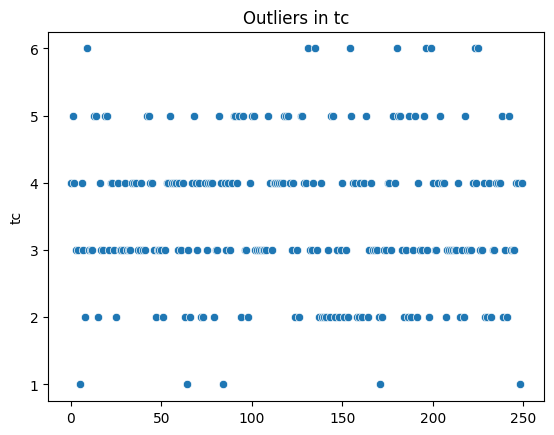

5      1
9      6
64     1
84     1
131    6
135    6
154    6
171    1
180    6
196    6
199    6
223    6
225    6
248    1
Name: tc, dtype: int64


In [8]:
outliers_tc = outlier_analysis(df['tc'])
outlier_report('tc')

print(outliers_tc)

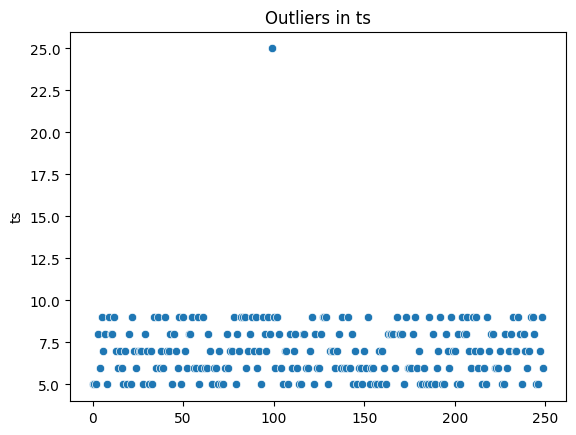

99    25
Name: ts, dtype: int64


In [9]:
outliers_ts = outlier_analysis(df['ts'])
outlier_report('ts')


print(outliers_ts)

## Análise de Correlação

### Interpretação do Coeficiente de Correlação
- **0.0 a 0.1**: Correlação desprezível.
- **0.1 a 0.3**: Correlação pequena.
- **0.3 a 0.5**: Correlação moderada.
- **0.5 a 0.7**: Correlação alta.
- **0.7 a 0.9**: Correlação muito alta.
- **0.9 a 1.0**: Correlação quase perfeita.


### Visualização
A visualização da correlação pode ser feita através de um gráfico de dispersão com uma linha de tendência, que ajuda a identificar visualmente a relação entre as variáveis.

In [10]:
def correlation_analysis(df, col1, col2):
    correlation = df[[col1, col2]].corr().iloc[0, 1]
    sns.lmplot(x=col1, y=col2, data=df, aspect=2, height=6)
    plt.title(f'Correlation between {col1} and {col2}: {correlation:.2f}')
    plt.show()
    
    return correlation

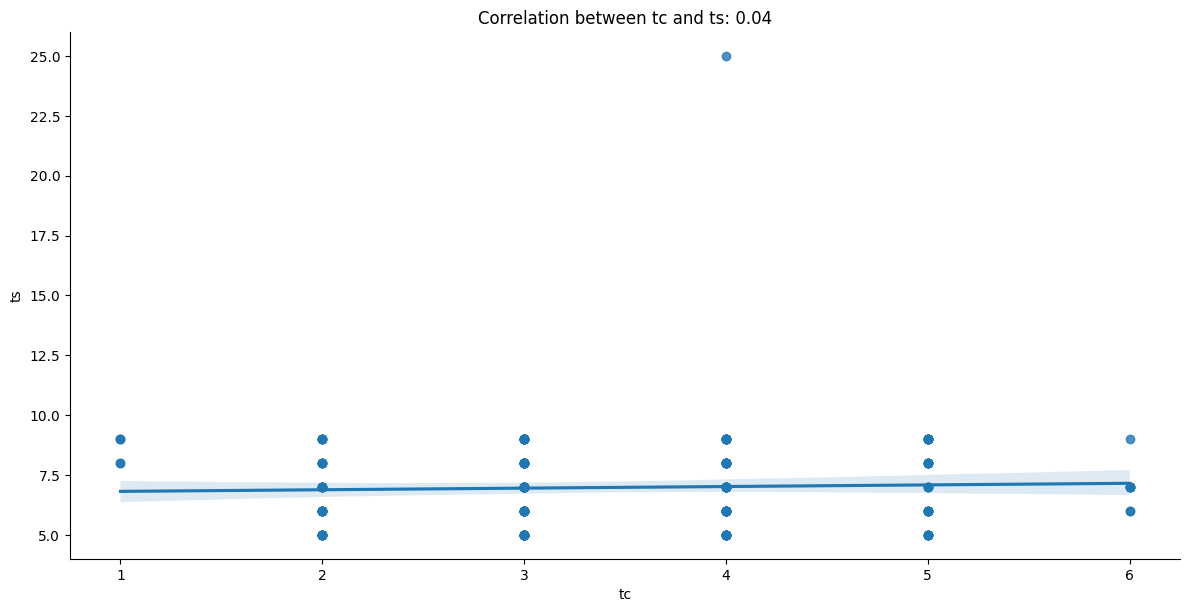

0.041209511494501756


In [11]:
correlation_tc_ts = correlation_analysis(df, 'tc', 'ts')
print(correlation_tc_ts)

## Análise de Histogramas

#### Histograma da Variável `tc`
O histograma da variável `tc` mostra a frequência de ocorrência dos valores de `tc` em diferentes intervalos. A análise desse histograma pode revelar se os dados estão concentrados em torno de um valor central ou se estão espalhados por uma ampla faixa de valores.

#### Histograma da Variável `ts`
O histograma da variável `ts` apresenta a distribuição dos valores de `ts`. Esse gráfico é útil para identificar a presença de valores extremos (outliers) e para entender a dispersão dos dados em relação à média.

### Interpretação dos Histogramas
- **Distribuição**: A forma do histograma pode indicar se a distribuição dos dados é simétrica, assimétrica, unimodal (um pico) ou multimodal (vários picos).
- **Assimetria**: A assimetria (skewness) pode ser observada pela inclinação do histograma. Uma distribuição assimétrica à direita tem uma cauda mais longa à direita, enquanto uma distribuição assimétrica à esquerda tem uma cauda mais longa à esquerda.
- **Curtose**: A curtose (kurtosis) indica o "achatamento" da distribuição. Histogramas com caudas mais pesadas (valores extremos mais frequentes) têm alta curtose, enquanto histogramas com caudas mais leves têm baixa curtose.
- **Outliers**: Valores que se destacam significativamente dos demais podem ser identificados como outliers.

In [12]:
def plot_histogram(df, column):
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

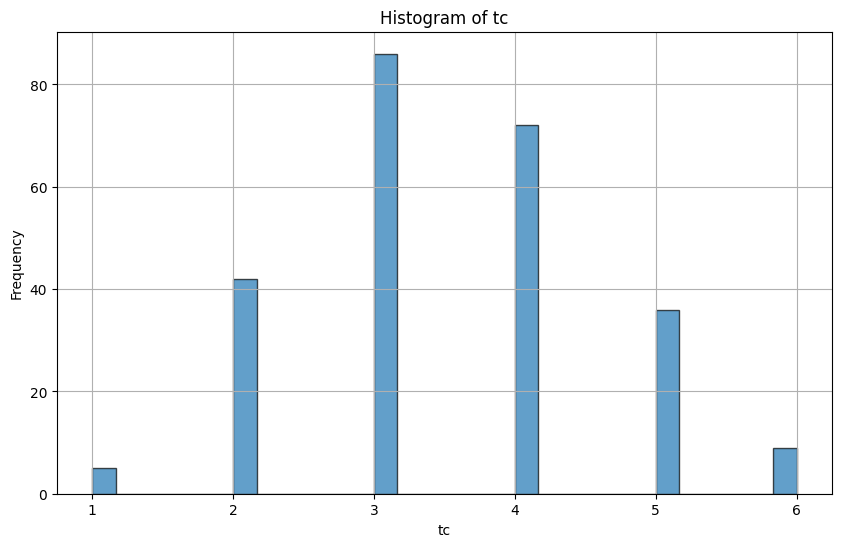

In [13]:
plot_histogram(df, 'tc')

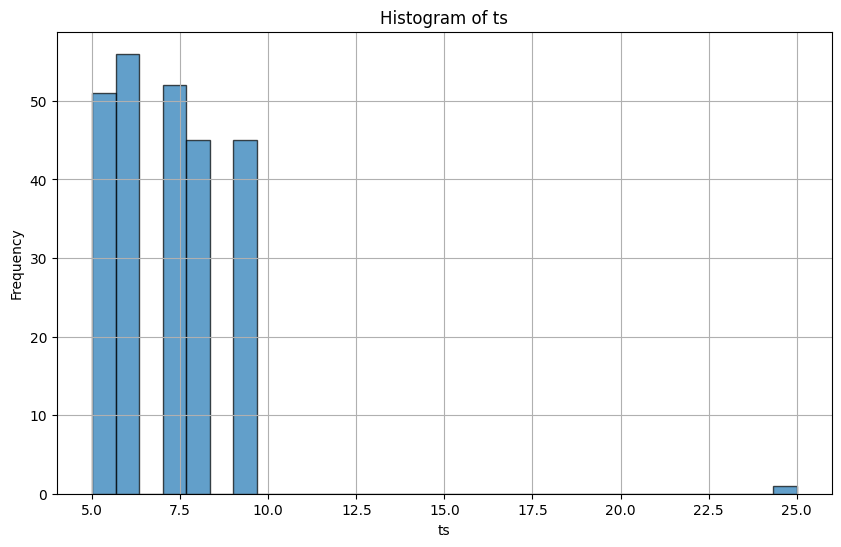

In [14]:
plot_histogram(df, 'ts')